<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# Exploratory Computing with Python
*Developed by Mark Bakker and David Steffelbauer*

## Notebook 11: Linear Regression

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In this Notebook, we learn how to fit a straight line to a set of data; fitting a model to data is also called regression analysis. We discuss how the best parameters are computed and how the goodness of fit can be quantified. Next, we apply linear regression analysis to real data of a water distribution system of a small town to try to detect a leak. At the end of the Notebook, we try to compute confidence intervals of our fitted lines. 

### Root mean squared error
One way to quantify the fit between data and a model is to compute the root mean squared error. The error is defined as the difference between the observed value and the modeled value. Another term for the error is the residual. The error of data point $i$ is written as 

$$\varepsilon_i = y_i - \hat{y}_i$$ 

where $y_i$ is the measured (observed) value and $\hat{y}_i$ is the fitted value. The sum of squared errors $S$ is

$$S = \sum_{i=1}^N{\varepsilon_i^2}$$ 

where $N$ is the number of observations. Finally, the root mean squared error $E$ is computed as

$$E=\sqrt{\frac{1}{N}S}=\sqrt{\frac{1}{N}\sum_{i=1}^N{\varepsilon_i^2}}$$

The root mean squared error is an estimate of the goodness of fit and can be computed for any model and any dataset.

### Exercise 1. Fit a straight line
The file `xydatafit.dat` contains $x$ values (first row) and $y$ values (second row). Fit a straight line $y=ax+b$ through the data using the `linregress` function of `scipy.stats`. Note that the `linregress` function returns 3 other values besides the slope and intercept (use `linregress?` to find out what they are; more on these 3 additional values later on in this Notebook). Plot the data (with markers) and add the fitted straight line. Add 'x' and 'y' as labels along the axes. Add a legend and specify the legend for each plot using the `label` keyword argument in the `plot` function. Add the root mean squared error as a title to the graph (use `f-string` formatting with 3 significant digits). Print the optimal values for the slope and intercept of the straight line to the screen (using 3 significant digits).

slope = -0.029, intercept = 0.397


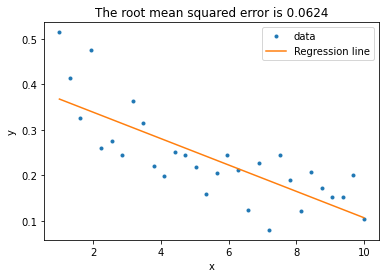

In [4]:
from scipy.stats import linregress as lr
a = np.loadtxt("xydatafit.dat")
b = lr(a[0], a[1])
plt.plot(a[0], a[1], ".", label = "data")
xdata = np.linspace(1, 10, 100)
ydata = b[0] * xdata + b[1]
plt.plot(xdata, ydata, label = "Regression line")
plt.xlabel("x")
plt.ylabel("y")
ybar = b[0] * a[0] + b[1]
MSE_root = np.square(np.subtract(a[1],ybar)).mean() ** 0.5
plt.title(f"The root mean squared error is {MSE_root:.3g}")
plt.legend()
print(f"slope = {b[0]:.3g}, intercept = {b[1]:.3g}")

## Least squares
In the exercise above, the *optimal* or *best* parameters were obtained with the `linregress` method. But how did `linregress` do that? Or maybe a more fundamental question: 'What is *optimal*?' or 'What is *best*?'. In this Notebook, we define *best* as the parameter set that minimizes the sum of the squared errors $S$ (so it also minimizes the root mean squared error $E$). Such an optimization approach is referred to as a *least squares* approach. 

The straight line is written as $y=ax+b$, where $a$ is the slope of the line and $b$ is the intercept (it is the value of $y$ for $x=0$). In the code cell below, we write a function that takes four input arguments: an array of observed $x$ values, an array of corresponding $y$ values, the slope $a$, and the intercept $b$. The function returns the sum of squared errors $S$.

In [5]:
def sse(a, b, x=xdata, y=ydata):
    error = y - (a * x + b)
    return np.sum(error ** 2)

Different values of $a$ and $b$ give different values for the sum of squared errors. The sum of squared errors is larger for $a=-0.05$ and $b=0.3$ than for $a=-0.02$ and $b=0.5$:

In [6]:
print(f'sse of a=-0.05, b=0.3: {sse(a=-0.05, b=0.3)}')
print(f'sse of a=-0.02, b=0.5: {sse(a=-0.02, b=0.5)}')

sse of a=-0.05, b=0.3: 4.811338168934315
sse of a=-0.02, b=0.5: 2.3875256957109197


What we can do is compute the `sse` function for a larger number of $a$ and $b$ values. If we do that on a grid, we can create contours of the `sse` function. The `sse` function is constant along any contour. A contour map of the `sse` function is similar to an elevation map. The goal is now to find the combination of $a$ and $b$ that gives the smallest value of the sum of squared errors. In the graph below, you can see that the smallest value of `sse` is obtained at $a\approx -0.03$, $b\approx 0.4$.

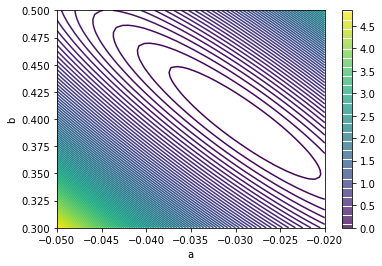

In [11]:
a, b = np.meshgrid(np.linspace(-0.05, -0.02, 50), np.linspace(0.3, 0.5, 50))
ssevec = np.vectorize(sse)
z = ssevec(a, b)
plt.contour(a, b, z, 100)
plt.colorbar()
plt.xlabel('a')
plt.ylabel('b');

How do we minimize the sum of squared errors? As usual, we find the minimum of a function by taking the derivative and setting it to zero. For a straight line, this can be done exactly. We won't derive the equations here (you will learn them in CTB3310). For more complicated models, the minimum is found with a search algorithm, as we will do in the next notebook. 

### The correlation coefficient and $p$-value. 
The `linregress` function returns 5 values. Besides the slope and intercept, these are somewhat cryptically defined as the correlation coefficient, the $p$-value, and the standard error (the last one is not explained in this Notebook). Each of these three values is a quantification of the goodness of fit. Let's first discuss the correlation coefficient.

The square of the correlation coefficient $r$ is the *r-squared value* and is defined as

$$r^2 = 1 - \sum{(y_i - \hat{y}_i)^2} \left/ \sum{(y_i - \bar{y})^2} \right. $$

where $y_i$ is the $y$ value of data point $i$, while $\hat{y}_i$ is the fitted value at data point $i$. If the model goes exactly through the data (a perfect fit), then $y_i - \hat{y}_i=0$ for every $i$, and $r^2=1$. If the model doesn't do any better than simply the mean of $y$, then the  $r^2$ is zero. A value of $r^2$ close to 1 is generally a good thing, but it is not possible to say anything definitive about the goodness of fit by just reporting the $r^2$ value (although many people do).

### Meaning of the $p$-value
The fourth return value of the `linregress` function is the $p$-value. The $p$-value is related to the question whether the estimated slope is significantly different from zero. When the slope is significantly different from zero, you can state that there is a linear relationship between the two variables. The $p$-value is related to the question whether the estimated absolute value of the slope is significantly different from zero when you perform a statistical test, a $t$-test to be precise. When the $p$-value is less than 0.05, this means that when you perform a two-sided $t$-test you can reject the null hypothesis that the slope is zero in favor of the alternative hypothesis that the slope is not zero. In layman terms: it means that there is less than 5% chance that the slope is zero and more than 95% chance that the slope is not zero. Or even simpler: the slope is significantly different from zero. Obviously, for the current data, there is a high probability that the slope is significantly different from zero.

### Exercise 2. Getting a value of $p<0.05$ by chance
Write a function that generates 100 $x$ values randomly from a uniform distribution between 0 and 1 and 100 $y$ values randomly from a uniform distribution between 0 and 1. Use the `np.random.rand` function to generate the random numbers. Next, fit a straight line using `linregress`. The function takes no input arguments and returns the fitted slope, the fitted intercept, the $p$-value, the generated $x$ values, and the generated $y$ values. 

Next, perform the following experiment: Call the function you wrote 1000 times and count how many times $p<0.05$, which means the slope of the fitted line is significantly different from zero even though the data is random. Print the number of times $p<0.05$ to the screen. As you will see, you will get approximately 50 out of the 1000 experiments where a line is fitted with a $p$-value smaller than 0.05 just by chance. That means that 5% of the time you will incorrectly conclude that there is a linear relationship between $x$ and $y$.

In [6]:
def linr():
    x = np.random.rand(100)
    y = np.random.rand(100)
    slope = lr(x , y)[0]
    interc = lr(x , y)[1]
    return slope, interc, lr(x , y)[3], x, y
i = 0
j = 0
while i < 1000:
    a = linr()
    i += 1 
    if a[2] < 0.05:
        j += 1
print(f"The number of times p < 0.05 is {j}")

The number of times p < 0.05 is 53


### Exercise 3. Getting a value of $p<0.05$ by chance contiued
Call the function your wrote in Exercise 2 inside a loop and break out of the loop when you find a dataset where $p<0.02$. Make a graph for this dataset. Plot the dataset with dots and the fitted line with a line. Add labels and a legend. Can you see a linear relationship between $x$ and $y$?

p = 0.00026733338417854566, while I can not see a linear relationship


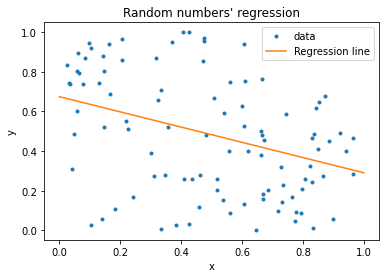

In [7]:
while i:
    a = linr()
    if a[2] < 0.02:
        break
plt.plot(a[3], a[4], ".", label = "data")
xx = np.linspace(0, 1, 100)
yy = a[0] * xx + a[1]
plt.plot(xx, yy, label = "Regression line")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Random numbers' regression")
print(f"p = {a[2]}, while I can not see a linear relationship")

## Real data - Minimum Night Flow analysis
The csv file `inflow_data.csv` contains real data of inflow measurements in a water distribution system from a small town (approx 2000 inhabitants) in Austria in February 2017. Inflow in a system is an important measure since it represents the total water consumption of all households in a certain area. It also contains data of water losses. The first column of the file contains the date and time when the measurements were taken, and the second column contains the inflow measurements in liters per second.

### Exercise 4. Inflow data
Load the inflow data from the file `inflow_data.csv` using `pandas` and make sure the date can be used as an index. Make a graph of the inflow data for the entire month using a figure size of `(10,5)`. Add labels on the axes. Next, in a separate graph, make a graph of the inflow data for February 1, 2017. 

<AxesSubplot:title={'center':'Inflow for 2017-2-1'}, xlabel='time', ylabel='l/s'>

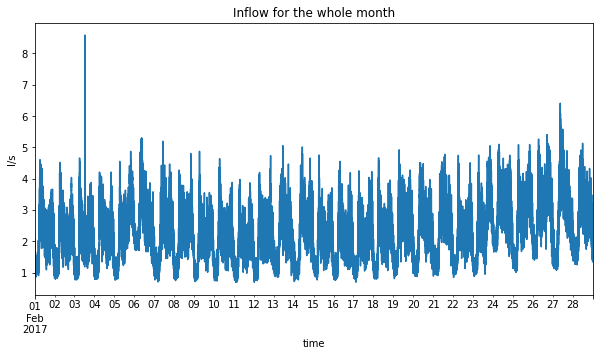

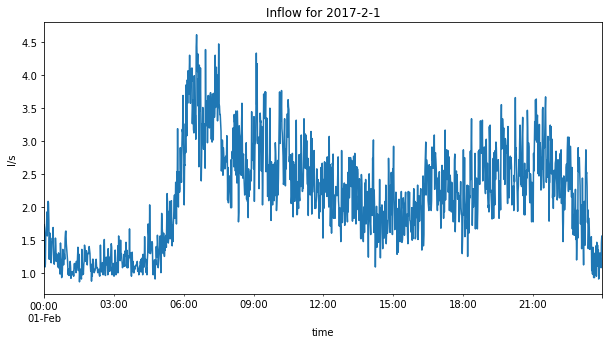

In [7]:
import pandas as pd
inflow = pd.read_csv("inflow_data.csv", index_col = [0], parse_dates = [0])
inflow.Inflow.plot(ylabel = "l/s", title = "Inflow for the whole month", figsize = (10, 5))
plt.figure()
inflow.Inflow["2017-02-01"].plot(ylabel = "l/s", title = "Inflow for 2017-2-1", figsize = (10, 5))

From the first figure, you see that the water consumption follows a certain pattern with repeating elements with a frequency of 24 hours. On the third day, we can see a large spike in the consumption. During the nighttime on the 6th of February, the flow seems to be larger compared to the other nights. This can also be seen on the 24th and the 26th. 

The water consumption follows the daily routine of the inhabitants in a zone. From the second figure, you can see that around 6:00 in the morning, people wake up and use lots of water water (e.g. to shower, go to the toilet or prepare breakfast), resulting in the so-called morning peak. After that, some people will go to work and leave the area, so that the water consumption decreases. In the evening, people return to their homes, and more water is used resulting in a second peak. For example,  people prepare dinner, take showers, do the laundry or dishes, use the toilet and brush their teeth before they go to bed. While people are sleeping, they do not use water. This can be seen between 2:00 and 4:00 in the night, which are called the minimum night flow (MNF) hours.

The MNF hours are very important for water utilities. Since the consumption is minimal, the pressure in the system is high. Leakage from water distribution systems is pressure dependent: The higher the pressure, the more water is lost through leakage. Hence, leaks can be detected easiest during the MNF hours. In addition, fluctuations in the inflow measurements is minimal during the MNF hours. Let's have a closer look at the water consumption during the MNF hours.

### Exercise 5. Minimum Night Flow (MNF)
Compute the mean inflow between the MNF hours (from 2:00 till 4:00) for each day (so 28 values). Use the `.between_time` function of `pandas` to select all the inflows between 2:00 and 4:00 and store the values in a new `DataFrame`. Next, use `resample` to compute the mean MNF value for each day.  Make a bar graph of the mean MNF.

<AxesSubplot:title={'center':'MNF'}, xlabel='time'>

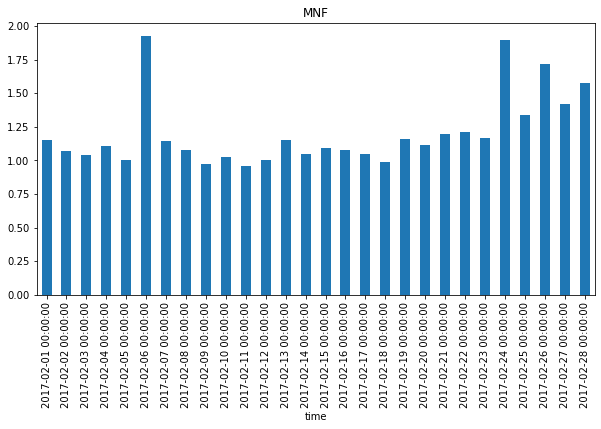

In [8]:
MNF = inflow.Inflow.between_time("2:00", "4:00")
MNF.resample("d").mean().plot(kind = "bar", figsize = (10, 5), title = "MNF")

Note again the higher consumption on February the 6th, 24th and 26th (and the 28th). Water utilities analyze the MNF to find leaks in their system. If the consumption during MNF shows a clear peak, there may be a leak in the system, and the utility company may send out a team to find and repair the leak. 

Not all leaks result in a sudden increase in water consumption. Some leaks grow slowly over time. These leaks are harder to find: the MNF increases slowly over time. This is where linear regression analysis may be useful.

### Exercise 6. A simple $p$-value based leak detector
Write a function that takes two input arguments: an array with day numbers and a corresponding array with the MNF for those days. The function performs a linear regression and creates a graph showing the data with markers and the fitted line. The title of the graph is the $p$-value and the text 'there is a leak!' when the $p$-value of the linear regression is smaller than 0.05 and 'there is probably no leak' otherwise. The function returns nothing. Use the MNF data computed in the previous exercise. Call your function with the first 14 days of data and after that with the last 14 days of data (so you end up with two separate graphs).

[15 16 17 18 19 20 21 22 23 24 25 26 27 28]


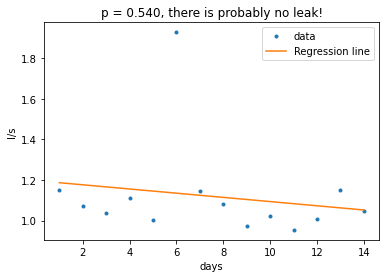

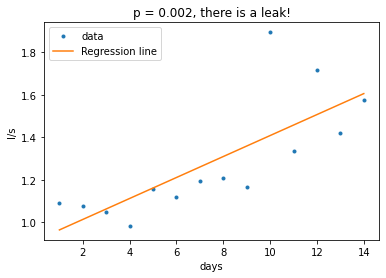

In [27]:
def leak(a, b):
    sol = lr(a, b)
    plt.plot(a, b, ".", label = "data")
    b = a * sol[0] + sol[1]
    plt.plot(a, b, label = "Regression line")
    plt.xlabel("days")
    plt.ylabel("l/s")
    plt.legend()
    if sol[3] < 0.05:
        plt.title(f"p = {sol[3]:.3f}, there is a leak!")
    else:
        plt.title(f"p = {sol[3]:.3f}, there is probably no leak!")
        
a = MNF.resample("d").mean()
leak(np.arange(1, 15, 1), np.array(a["2017-2-1":"2017-2-14"]))
plt.figure()
leak(np.arange(1, 15, 1), np.array(a["2017-2-15":"2017-2-28"]));